In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
data_proteomes = "data/77_cancer_proteomes_CPTAC_itraq.csv"
data_clinical = "data/clinical_data_breast_cancer.csv"

protein_df = pd.read_csv(data_proteomes)
clinical_df = pd.read_csv(data_clinical)

In [7]:
protein_df.head()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [8]:
clinical_df.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [10]:
list(clinical_df)

['Complete TCGA ID',
 'Gender',
 'Age at Initial Pathologic Diagnosis',
 'ER Status',
 'PR Status',
 'HER2 Final Status',
 'Tumor',
 'Tumor--T1 Coded',
 'Node',
 'Node-Coded',
 'Metastasis',
 'Metastasis-Coded',
 'AJCC Stage',
 'Converted Stage',
 'Survival Data Form',
 'Vital Status',
 'Days to Date of Last Contact',
 'Days to date of Death',
 'OS event',
 'OS Time',
 'PAM50 mRNA',
 'SigClust Unsupervised mRNA',
 'SigClust Intrinsic mRNA',
 'miRNA Clusters',
 'methylation Clusters',
 'RPPA Clusters',
 'CN Clusters',
 'Integrated Clusters (with PAM50)',
 'Integrated Clusters (no exp)',
 'Integrated Clusters (unsup exp)']

<Figure size 432x288 with 0 Axes>

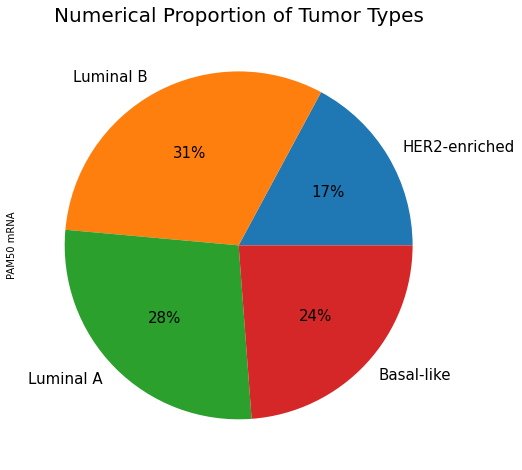

In [11]:
fig = plt.figure()
fig,ax = plt.subplots(figsize=(8,8))
plt.rcParams['font.size'] = 15.0
clinical_df['PAM50 mRNA'].value_counts(sort=False).plot(kind='pie',autopct='%1.0f%%')
plt.title('Numerical Proportion of Tumor Types',fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

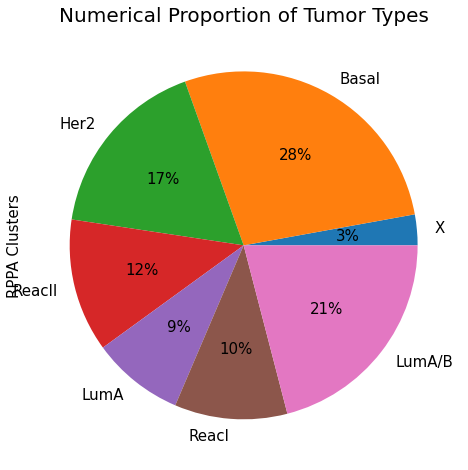

In [12]:
fig = plt.figure()
fig,ax = plt.subplots(figsize=(8,8))
plt.rcParams['font.size'] = 15.0
clinical_df['RPPA Clusters'].value_counts(sort=False).plot(kind='pie',autopct='%1.0f%%')
plt.title('Numerical Proportion of Tumor Types',fontsize=20)
plt.show()

In [ ]:
TumorOS=clinical_df.groupby(by='RPPA Clusters').mean()[['OS Time']]
TumorOS